# Linear Regression

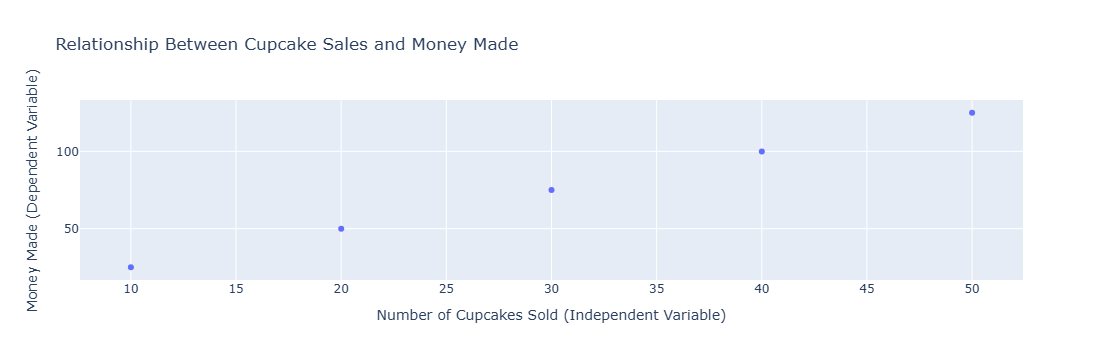

Predicted money made for the cupcakes sold: 62.5


In [1]:
# import libraries 
import numpy as np
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression

#sample data
num_cupcakes = [10, 20, 30, 40, 50]
money_made = [25, 50, 75, 100, 125]

figure = go.Figure()
figure.add_trace(go.Scatter(x=num_cupcakes, y=money_made, mode='markers',))
figure.update_layout(title='Relationship Between Cupcake Sales and Money Made',
                  xaxis_title='Number of Cupcakes Sold (Independent Variable)',
                  yaxis_title='Money Made (Dependent Variable)')
figure.show()

#create a linear regression model
x = np.array(num_cupcakes).reshape((-1, 1))
y = np.array(money_made)
model = LinearRegression().fit(x, y)

#predict the money made for 25 cupcakes sold
new_num_cupcakes = [[25]]
new_money_made = model.predict(new_num_cupcakes)
print("Predicted money made for the cupcakes sold:", new_money_made[0])

# Polynomial Regression

In [6]:
# import libraries
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Create sample dataset
months = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
sales = np.array([10, 20, 30, 50, 80, 120, 150, 180, 200, 220])

# Fit polynomial curve to the data
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(months.reshape(-1, 1))
lin_reg = LinearRegression()
lin_reg.fit(X_poly, sales)

# Make predictions for the next 3 months
future_months = np.array([11, 12, 13])
future_X_poly = poly_reg.fit_transform(future_months.reshape(-1, 1))
future_sales = lin_reg.predict(future_X_poly)
print(future_sales)

[219.16666667 202.04545455 162.57575758]


# Ridge and Lasso Regression

Ridge Regression MSE: 3077.41593882723
Lasso Regression MSE: 3403.5757216070733


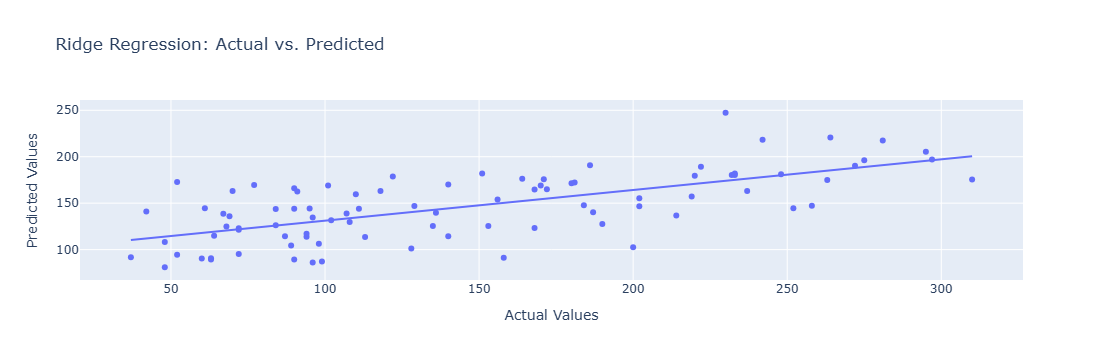

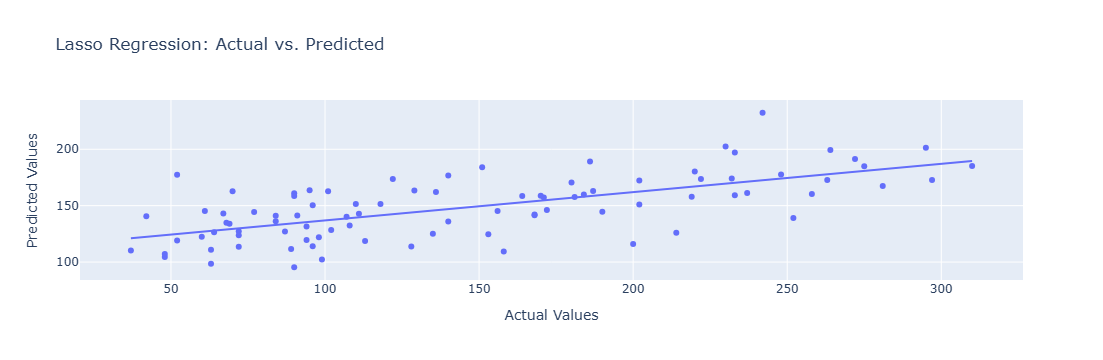

In [9]:
# import libraries
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import plotly.express as px

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regression Implementation
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Lasso Regression Implementation
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

# Evaluate the models
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print("Ridge Regression MSE:", mse_ridge)
print("Lasso Regression MSE:", mse_lasso)

# Create a DataFrame to store the results
results = pd.DataFrame({'Actual': y_test, 'Predicted_Ridge': y_pred_ridge, 
                        'Predicted_Lasso': y_pred_lasso})

# visualize the actual vs. predicted values for Ridge Regression
fig_ridge = px.scatter(results, x='Actual', y='Predicted_Ridge', 
                       title='Ridge Regression: Actual vs. Predicted',
                       labels={'Actual': 'Actual Values', 
                               'Predicted_Ridge': 'Predicted Values'},
                       trendline='ols')

# visualize the actual vs. predicted values for Lasso Regression
fig_lasso = px.scatter(results, x='Actual', y='Predicted_Lasso', 
                       title='Lasso Regression: Actual vs. Predicted',
                       labels={'Actual': 'Actual Values', 
                               'Predicted_Lasso': 'Predicted Values'},
                       trendline='ols')

fig_ridge.show()
fig_lasso.show()

# Logistic Regression

In [14]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

#sample dataset
credit_scores = np.random.randint(300, 850, size=1000)
loan_approved = np.random.binomial(1, p=1 / (1 + np.exp(-0.02 * (credit_scores - 700))), size=1000)

data = pd.DataFrame({
    'credit_score': credit_scores,
    'loan_approved': loan_approved
})

print(data.head())

model = LogisticRegression()
model.fit(data[['credit_score']], data['loan_approved'])

new_customer_credit_score = 750
new_customer_data = pd.DataFrame({'credit_score': [new_customer_credit_score]})
predicted_class = model.predict(new_customer_data[['credit_score']])[0]

# print the predicted class
if predicted_class == 0:
    print(f'A loan is not approved for a customer with a credit score of {new_customer_credit_score}.')
else:
    print(f'A loan is approved for a customer with a credit score of {new_customer_credit_score}.')

   credit_score  loan_approved
0           748              1
1           349              0
2           776              1
3           500              0
4           321              0
A loan is approved for a customer with a credit score of 750.


# Naive Bayes Algorithm

In [17]:
# import libraries 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

#sample movie data with genre tags and user ratings
movies = pd.DataFrame({
    'movie_title': ['Movie A', 'Movie B', 'Movie C', 'Movie D', 'Movie E'],
    'genre_action': [1, 1, 0, 1, 0],
    'genre_adventure': [1, 0, 1, 0, 1],
    'genre_comedy': [0, 1, 1, 0, 0],
    'genre_drama': [0, 0, 0, 1, 1],
    'user_rating': [5, 4, 3, 2, 1]
})

print(movies.head())

#split the data into features (genre tags) and labels (user ratings)
x = movies.drop(['movie_title', 'user_rating'], axis=1)
y = movies['user_rating']

#training the model
clf = MultinomialNB()
clf.fit(x, y)

new_movie = pd.DataFrame({
    'genre_action': [1],
    'genre_adventure': [1],
    'genre_comedy': [0],
    'genre_drama': [0]
})

user_rating_pred = clf.predict(new_movie)
print("Predicted user rating for the new movie:", user_rating_pred[0])

  movie_title  genre_action  genre_adventure  genre_comedy  genre_drama  \
0     Movie A             1                1             0            0   
1     Movie B             1                0             1            0   
2     Movie C             0                1             1            0   
3     Movie D             1                0             0            1   
4     Movie E             0                1             0            1   

   user_rating  
0            5  
1            4  
2            3  
3            2  
4            1  
Predicted user rating for the new movie: 5


# Gaussian, Multinomial, Bernoulli Naive Bayes Algorithm

In [21]:
# Gaussian NBA
# import libraries
import numpy as np
from sklearn.naive_bayes import GaussianNB

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
Y = np.array([1, 1, 1, 2, 2, 2])

clf = GaussianNB()
clf.fit(X, Y)
print(clf.predict([[-0.8, -1]]))

clf_pf = GaussianNB()
clf_pf.partial_fit(X, Y, np.unique(Y))
print(clf_pf.predict([[-0.8, -1]]))

[1]
[1]


In [23]:
# Multinomial NBA
# import libraries
import numpy as np
from sklearn.naive_bayes import MultinomialNB

rng = np.random.RandomState(1)
X = rng.randint(5, size=(6, 100))
y = np.array([1, 2, 3, 4, 5, 6])

clf = MultinomialNB()
clf.fit(X, y)
print(clf.predict(X[2:3]))

[3]


In [25]:
# Bernoulli NBA 
# import libraries 
import numpy as np
from sklearn.naive_bayes import BernoulliNB

rng = np.random.RandomState(1)
X = rng.randint(5, size=(6, 100))
Y = np.array([1, 2, 3, 4, 4, 5])

clf = BernoulliNB()
clf.fit(X, Y)
print(clf.predict(X[2:3]))

[3]


# Support Vector Machine Algorithm

In [27]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

n = 100
credit_scores = np.random.normal(loc=650, scale=100, size=n)
income = np.random.normal(loc=50000, scale=10000, size=n)
default = np.zeros(n)

default_idx = np.random.choice(range(n), size=20, replace=False)
default[default_idx] = 1

dataset = np.column_stack((credit_scores, income, default))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataset[:, :2], dataset[:, 2], test_size=0.2, random_state=42)

# Train an SVM model on the training set
model = SVC(kernel='linear', C=1)
model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

# Nearest Neighbors

In [41]:
# Finding the Nearest Neighbors
# import libraries
from sklearn.neighbors import NearestNeighbors
import numpy as np

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)
print(indices)
print(distances)

nbrs.kneighbors_graph(X).toarray()

[[0 1]
 [1 0]
 [2 1]
 [3 4]
 [4 3]
 [5 4]]
[[0.         1.        ]
 [0.         1.        ]
 [0.         1.41421356]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.41421356]]


array([[1., 1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 1., 1.]])

In [45]:
# KDTree and BallTree Classes
# import libraries
from sklearn.neighbors import KDTree, BallTree
import numpy as np

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
kdt = KDTree(X, leaf_size=30, metric='euclidean')
kdt.query(X, k=2, return_distance=False)

array([[0, 1],
       [1, 0],
       [2, 1],
       [3, 4],
       [4, 3],
       [5, 4]], dtype=int64)

In [47]:
print(KDTree.valid_metrics)
print(BallTree.valid_metrics)

['euclidean', 'l2', 'minkowski', 'p', 'manhattan', 'cityblock', 'l1', 'chebyshev', 'infinity']
['euclidean', 'l2', 'minkowski', 'p', 'manhattan', 'cityblock', 'l1', 'chebyshev', 'infinity', 'seuclidean', 'mahalanobis', 'hamming', 'canberra', 'braycurtis', 'jaccard', 'dice', 'rogerstanimoto', 'russellrao', 'sokalmichener', 'sokalsneath', 'haversine', 'pyfunc']


# Decision Tree Algorithm

In [50]:
# import libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

credit_scores = [650, 720, 580, 800, 690, 750, 600, 670, 710, 680]
loan_approval = [1, 1, 0, 1, 0, 1, 0, 1, 1, 0] 

data = {"Credit_Score": credit_scores, "Loan_Approval": loan_approval}
df = pd.DataFrame(data)
print(df.head())

X = df[['Credit_Score']]
y = df['Loan_Approval']

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

   Credit_Score  Loan_Approval
0           650              1
1           720              1
2           580              0
3           800              1
4           690              0


DecisionTreeClassifier(random_state=42)

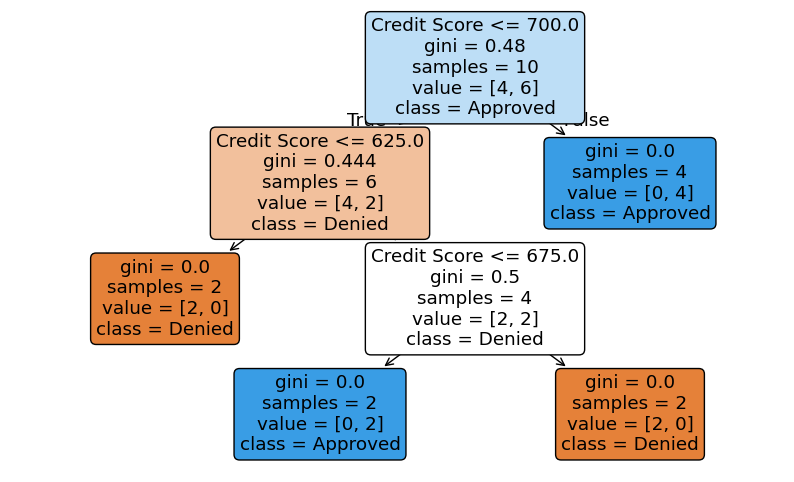

In [52]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(10, 6))
plot_tree(clf, filled=True, rounded=True, 
          feature_names=['Credit Score'], 
          class_names=['Denied', 'Approved'])
plt.show()

In [54]:
user_credit_score = float(input("Enter your credit score: "))

prediction = clf.predict([[user_credit_score]])

if prediction[0] == 1:
    print("Congratulations! Your loan application is likely to be approved.")
else:
    print("We regret to inform you that your loan application is likely to be denied.")

Enter your credit score:  725


Congratulations! Your loan application is likely to be approved.


E:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



# Random Forest Algorithm

In [69]:
# import libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

# Define sample data
data = {'age': [25, 30, 35, 40, 45, 50, 55, 60],
        'gender': ['M', 'F', 'F', 'M', 'F', 'M', 'F', 'M'],
        'previous_purchase': ['yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no'],
        'category': ['electronics', 'books', 'fashion', 'electronics', 'fashion', 'books', 'electronics', 'fashion'],
        'price': [100, 50, 80, 150, 70, 60, 120, 90],
        'popular': [1, 0, 1, 0, 1, 0, 1, 0]}

data = pd.DataFrame(data)
print(data)

# Split data into features and target
X = data.drop(['popular'], axis=1)
y = data['popular']

# One-hot encode categorical columns
cat_cols = ['gender', 'previous_purchase', 'category']
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_cat = encoder.fit_transform(X[cat_cols])
X_cat_df = pd.DataFrame(X_cat, columns=encoder.get_feature_names_out(cat_cols))
X = pd.concat([X.drop(cat_cols, axis=1), X_cat_df], axis=1)

# Train the model
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X, y)

# New Data
new_samples = {'age': [25, 30, 35],
               'gender': ['F', 'M', 'F'],
               'previous_purchase': ['no', 'yes', 'no'],
               'category': ['fashion', 'books', 'electronics'],
               'price': [80, 50, 120]}

# Create DataFrame
new_df = pd.DataFrame(new_samples)

# One-hot encode categorical columns in new data
new_cat = encoder.transform(new_df[cat_cols])
new_cat_df = pd.DataFrame(new_cat, columns=encoder.get_feature_names_out(cat_cols), index=new_df.index)
new_df = pd.concat([new_df.drop(cat_cols, axis=1), new_cat_df], axis=1)
# Make predictions
predictions = rf.predict(new_df)
print(predictions)

   age gender previous_purchase     category  price  popular
0   25      M               yes  electronics    100        1
1   30      F                no        books     50        0
2   35      F               yes      fashion     80        1
3   40      M                no  electronics    150        0
4   45      F               yes      fashion     70        1
5   50      M                no        books     60        0
6   55      F               yes  electronics    120        1
7   60      M                no      fashion     90        0
[0 1 0]


# Gradient Boosting Classifier

In [2]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.datasets import make_hastie_10_2

X, y = make_hastie_10_2(random_state=0)
X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]

clf = HistGradientBoostingClassifier(max_iter=100).fit(X_train, y_train)
clf.score(X_test, y_test)

0.8965

# AdaBoost Classifier

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

X, y = load_iris(return_X_y=True)
clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

E:\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
E:\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
E:\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
E:\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
E:\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.

0.9466666666666665

# K-Means Clustering

In [8]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

data = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")
print(data.columns)
data = data.loc[:, ["median_income", "latitude", "longitude"]]
print(data.head())

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
   median_income  latitude  longitude
0         8.3252     37.88    -122.23
1         8.3014     37.86    -122.22
2         7.2574     37.85    -122.24
3         5.6431     37.85    -122.25
4         3.8462     37.85    -122.25


In [10]:
kmeans = KMeans(n_clusters=6)
data["Cluster"] = kmeans.fit_predict(data)
data["Cluster"] = data["Cluster"].astype("int")
print(data.head())

   median_income  latitude  longitude  Cluster
0         8.3252     37.88    -122.23        1
1         8.3014     37.86    -122.22        1
2         7.2574     37.85    -122.24        1
3         5.6431     37.85    -122.25        1
4         3.8462     37.85    -122.25        2


Seaborn style not available, using default style.


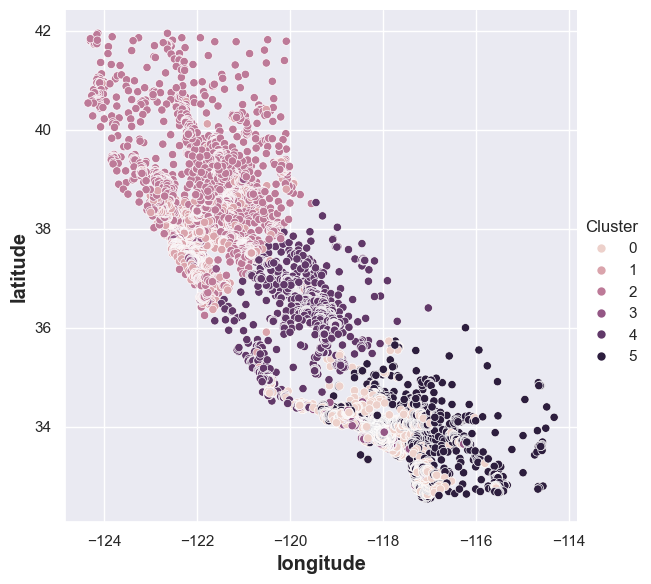

In [18]:
if 'seaborn' in plt.style.available:
    plt.style.use("seaborn")
else:
    print("Seaborn style not available, using default style.")

# Set the figure layout and axes properties
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight='bold', labelsize='large', titleweight='bold', titlesize=14, titlepad=10)

# Create the plot
sns.relplot(x="longitude", y="latitude", hue="Cluster", data=data, height=6)

# Show the plot
plt.show()

# DBSCAN Clustering

In [54]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

data = pd.read_csv("CC GENERAL.csv")
data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [56]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [58]:
data = data.drop('CUST_ID', axis=1)
data.fillna(data.mean(), inplace=True)

In [60]:
# scaling and normalizing the dataset
scaler = StandardScaler()
x_scaled = scaler.fit_transform(data)
from sklearn.preprocessing import normalize
x_normal = normalize(x_scaled)
x_normal = pd.DataFrame(x_normal)

In [62]:
# reduce the dimensionality of the dataset
pca = PCA(n_components=2)
x_principal = pca.fit_transform(x_normal)
x_principal = pd.DataFrame(x_principal)
x_principal.columns = ['V1', 'V2']
print(x_principal.head())

         V1        V2
0 -0.489826 -0.679678
1 -0.518791  0.545011
2  0.330885  0.268978
3 -0.482374 -0.092111
4 -0.563289 -0.481915


In [64]:
dbscan = DBSCAN(eps=0.036, min_samples=4).fit(x_principal)
labels = dbscan.labels_
data['cluster'] = dbscan.labels_
print(data.tail())

         BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
8945   28.493517           1.000000     291.12              0.00   
8946   19.183215           1.000000     300.00              0.00   
8947   23.398673           0.833333     144.40              0.00   
8948   13.457564           0.833333       0.00              0.00   
8949  372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
8945                    0.000000                          0.833333   
8946                    0.000000                

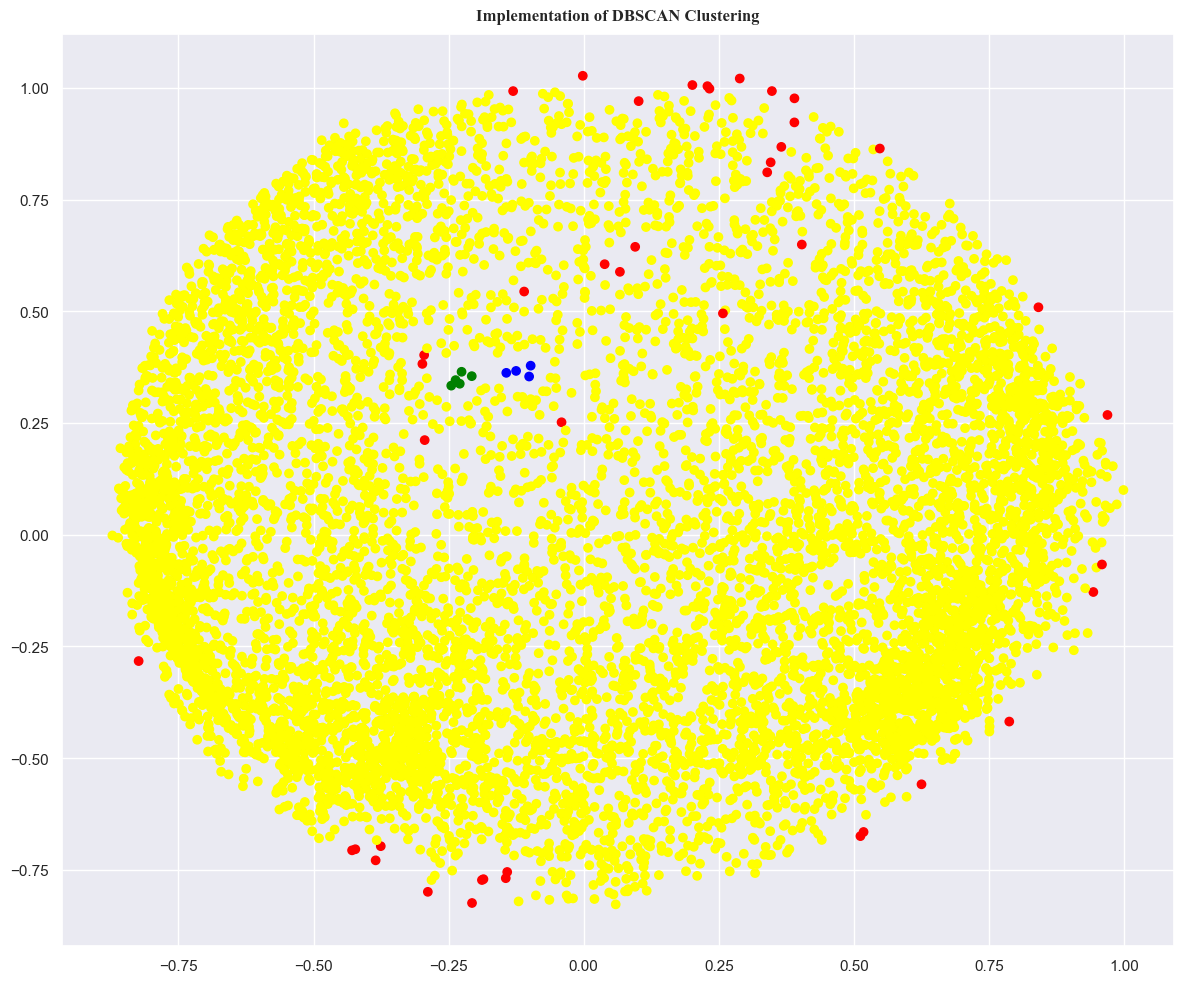

In [66]:
clusterColor = {0: u'yellow', 1: u'green', 2: 'blue', -1: u'red'}
colors = [clusterColor[label] for label in labels]
plt.figure(figsize=(12, 10))
plt.scatter(x_principal['V1'], x_principal['V2'], c=colors)
plt.title("Implementation of DBSCAN Clustering", fontname="Times New Roman",fontweight="bold")
plt.show()

# Agglomerative Clustering 

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/customers.csv")
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [28]:
data["Income"] = data[["Annual Income (k$)"]]
data["Spending"] = data[["Spending Score (1-100)"]]
data = data[["Income", "Spending"]]
print(data.head())

   Income  Spending
0      15        39
1      15        81
2      16         6
3      16        77
4      17        40


Seaborn whitegrid style not available, using default style.


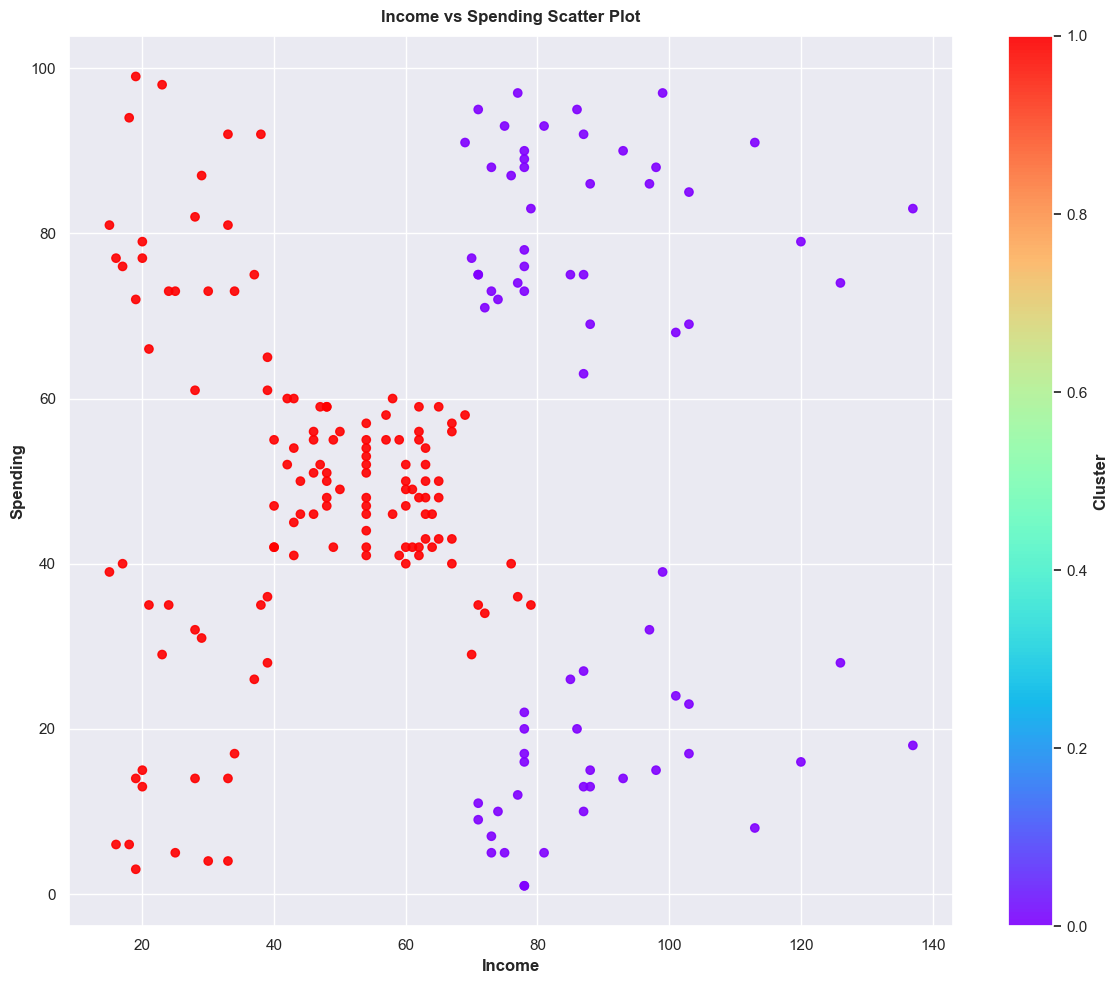

In [34]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering()
model.fit(data)
pred = model.fit_predict(data)
if 'seaborn-whitegrid' in plt.style.available:
    plt.style.use("seaborn-whitegrid")
else:
    print("Seaborn whitegrid style not available, using default style.")

# Create a figure with specified size
plt.figure(figsize=(12, 10))

# Create a scatter plot
plt.scatter(data["Income"], data["Spending"], c=pred, cmap='rainbow', alpha=0.9)

# Add labels and title (optional)
plt.xlabel("Income")
plt.ylabel("Spending")
plt.title("Income vs Spending Scatter Plot")

# Show the plot
plt.colorbar(label='Cluster')  # Optional: Add a color bar if 'pred' represents clusters
plt.show()

# BIRCH Clustering

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

data = pd.read_csv("customers.csv")
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [70]:
data["Income"] = data[["Annual Income (k$)"]]
data["Spending"] = data[["Spending Score (1-100)"]]
data = data[["Income", "Spending"]]
print(data.head())

   Income  Spending
0      15        39
1      15        81
2      16         6
3      16        77
4      17        40


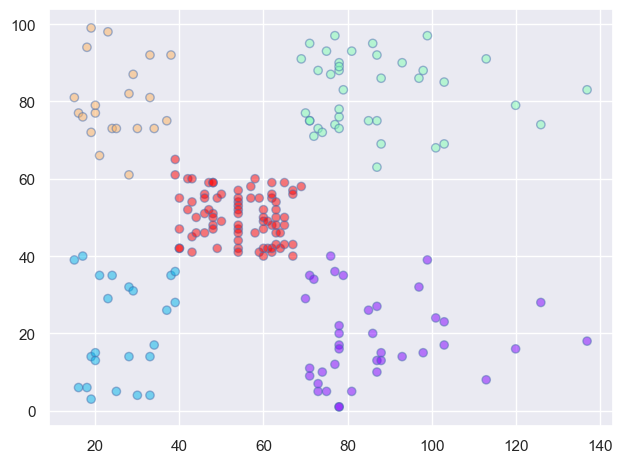

In [72]:
from sklearn.cluster import Birch
model = Birch(branching_factor=30, n_clusters=5, threshold=2.5)
model.fit(data)
pred = model.predict(data)
plt.scatter(data["Income"], data["Spending"], c=pred, cmap='rainbow', alpha=0.5, edgecolors='b')
plt.show()

# Mean Shift Clustering

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
   Income  Spending
0      15        39
1      15        81
2      16         6
3      16        77
4      17        40
Seaborn whitegrid style not available, using default style.


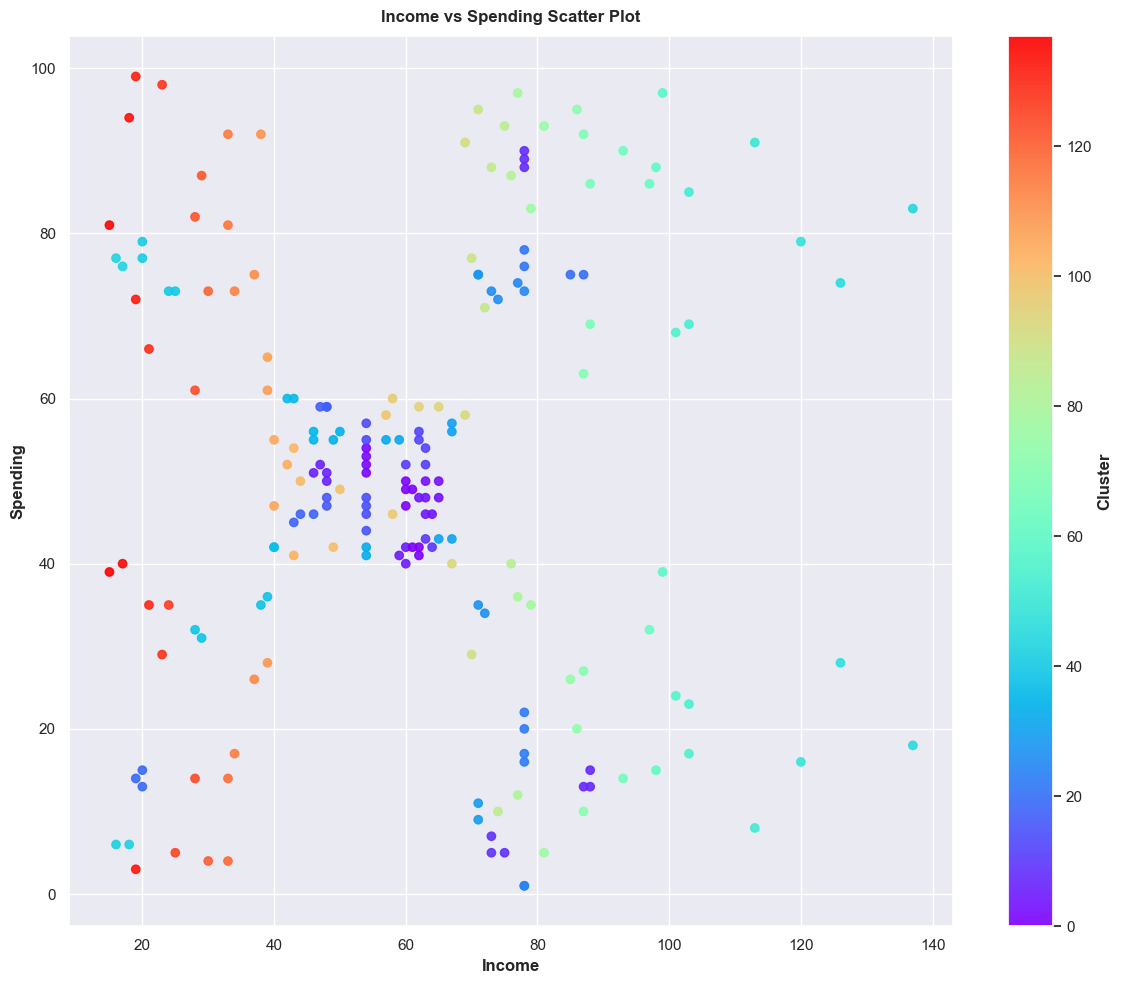

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/customers.csv")
print(data.head())
data["Income"] = data[["Annual Income (k$)"]]
data["Spending"] = data[["Spending Score (1-100)"]]
data = data[["Income", "Spending"]]
print(data.head())

from sklearn.cluster import MeanShift
model = MeanShift(bandwidth=2)
model.fit(data)
pred = model.fit_predict(data)
# Set the style
if 'seaborn-whitegrid' in plt.style.available:
    plt.style.use("seaborn-whitegrid")
else:
    print("Seaborn whitegrid style not available, using default style.")

# Create a figure with specified size
plt.figure(figsize=(12, 10))

# Create a scatter plot
plt.scatter(data["Income"], data["Spending"], c=pred, cmap='rainbow', alpha=0.9)

# Add labels and title (optional)
plt.xlabel("Income")
plt.ylabel("Spending")
plt.title("Income vs Spending Scatter Plot")

# Optional: Add a color bar if 'pred' represents clusters
plt.colorbar(label='Cluster')

# Show the plot
plt.show()

# Implementation of Perceptron

In [47]:

import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

# Load the Iris dataset
iris = load_iris()

# Select petal length and petal width as features
x = iris.data[:, (2, 3)]  # petal length, petal width

# Create binary target variable: 1 if iris setosa, else 0
y = (iris.target == 0).astype(int)  # iris setosa

# Initialize and fit the Perceptron model
perceptron = Perceptron()
perceptron.fit(x, y)

# Make a prediction
ypred = perceptron.predict([[2, 0.5]])

# Print the prediction
print(ypred)

[0]
